# Numeros Primos

Un entero positivo $p > 1$ es un número primo si sus unicos divisores son
$\pm 1$ y $\pm p$. Un entero positivo n que no es primo es llamado compuesto.

Si bien existe una infinidad de números primos, la cantidad de numeros primos menor que $n$ es finita. El teorema del numero primo nos entrega una cota asintótica para la función de conteo de primos $\pi(n)$.

\begin{align}
\pi(n) \approx \frac{n}{\operatorname{ln} (n)-B}
\end{align}

Donde $B$ es la constante de Legendre (https://mathworld.wolfram.com/PrimeNumberTheorem). 

La aproximación depende del tamaño de $x$ y se puede ver en la siguiente tabla:



In [70]:
import math 

phi= lambda n : x/math.log(n-1.08366)
prob= lambda n : 1./math.log(n)

print('|{:^20}|{:^20}|{:^20}|'.format('n','Phi(n)','Prob(n)'))
print('----------------------------------------------------------------')
for i in range(3,11):
    x=10**i
    print('|{0:^20.2e}|{1:^20.2f}|{2:^20.2f}|'.format(x,phi(x),prob(x)))

|         n          |       Phi(n)       |      Prob(n)       |
----------------------------------------------------------------
|      1.00e+03      |       144.79       |        0.14        |
|      1.00e+04      |      1085.75       |        0.11        |
|      1.00e+05      |      8685.90       |        0.09        |
|      1.00e+06      |      72382.42      |        0.07        |
|      1.00e+07      |     620420.69      |        0.06        |
|      1.00e+08      |     5428681.03     |        0.05        |
|      1.00e+09      |    48254942.44     |        0.05        |
|      1.00e+10      |    434294481.91    |        0.04        |


Esto implica que podemos generar una gran cantidad de numeros primos, sin embargo comprobar que son primos es generalmente dificil.

In [50]:
import random

def gen_number(size=128):
    return random.getrandbits(size)

def isPrime(n):
    if n<2:
        return False
    for i in range(2,int(math.sqrt(n)+1)):
        if n % i == 0:
            return False
    return True

In [54]:
n=gen_number(1024)
print('El numero {0} es primo ? : {1}'.format(n,isPrime(n)))

El numero 159989779285057732888097104528874156632107637414425554581794728854476905985277105833246356812137788937324958792050100303264464218366622559096669059416122561702753153801517090287063465895535879850419342424812899602683203465079926407002799644548889914202589981309338506737707057558737219928410511718348527809719 es primo ? : False


Probabilidad empirica=0.10, media=95.00 
Probabilidad aproximada 0.36, media=360.67


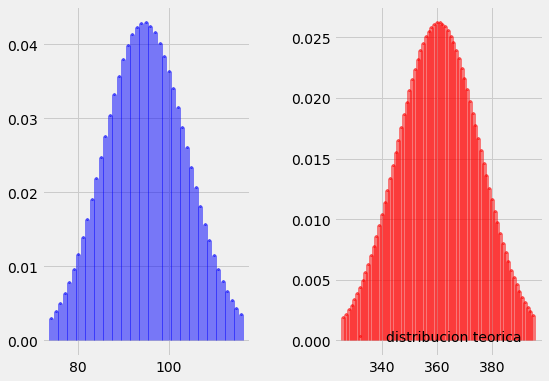

In [67]:
from scipy.stats import binom
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
import numpy as np

def trial_division(size,num_samples):
    num_primes=0
    num_samples=1000
    for i in range(num_samples):
        n=gen_number(2**4)
        if isPrime(n):
            num_primes+=1
    return num_primes/num_samples

num_samples=1000
ps=trial_division(2**4,num_samples)
print('Probabilidad empirica={0:0.2f}, media={1:0.2f} '.format(p_s,num_samples*p_s))

p_n=prob(2**4)
print('Probabilidad aproximada {0:0.2f}, media={1:0.2f}'.format(p_n,num_samples*p_n))

x = np.arange(binom.ppf(0.01,num_samples, p_s),
              binom.ppf(0.99, num_samples, p_s))

fig = plt.figure(figsize=(8, 6))
fig.subplots_adjust(hspace=0.4, wspace=0.4)
ax = fig.add_subplot(1, 2, 1)
ax.plot(x, binom.pmf(x, num_samples, p_s), 'bo', ms=2,alpha=0.5, label='distribucion empirica')
ax.vlines(x, 0, binom.pmf(x, num_samples, p_s), colors='b', lw=5, alpha=0.5)

x2 = np.arange(binom.ppf(0.01,num_samples, p_n),
              binom.ppf(0.99, num_samples, p_n))
ax = fig.add_subplot(1, 2, 2)
ax.plot(x2, binom.pmf(x2, num_samples, p_n), 'ro', ms=2,alpha=0.5, label='distribucion teorica')
ax.vlines(x2, 0,  binom.pmf(x2, num_samples, p_n),  colors='r', lw=5, alpha=0.5)
ax.legend(loc='best', frameon=False)

plt.show()


El tiempo para realizar la prueba de primalidad mediante fuerza bruta crece exponencialmente con respecto al numero. Una alternativa es utilizar el terorema de Fermat. Si $n$ es primo y $a$ un entero positivo no divisible por $p$, entonces:

\begin{align}
a^{n-1} \equiv 1 ( \operatorname{mod} n)
\end{align}

In [68]:
from random import randint
 
def isProbablyPrime(n, k = 5):
    if (n < 2 ):
        return False
    output = True
    for i in range(0, k):
        a = randint(1, n-1)
        # pow(x, y, z=None)=x**y % z
        if (pow(a, n-1, n) != 1):
            return False 
    return output

In [71]:
n=gen_number(1024)
print('El numero {0} es primo ? : {1}'.format(n,isProbablyPrime(n)))

El numero 113120143732576475604428073635771144682355939963156535579510789104635977103732818748059732422105563020817048442027486542573457028386337799185459155552805309568233656043377612941548356627534109533761054724167297337546344949789195336961935723836828002141279717949730477612767768490933947390869286966105963570686 es primo ? : False


# Algoritmo Rabin-Miller

```
Input: n > 3, an odd integer to be tested for primality;
Input: k, a parameter that determines the accuracy of the test
Output: composite if n is composite, otherwise probably prime
write n − 1 as 2s·d with d odd by factoring powers of 2 from n − 1
LOOP: repeat k times:
   pick a randomly in the range [2, n − 2]
   x ← ad mod n
   if x = 1 or x = n − 1 then do next LOOP
   for r = 1 .. s − 1
      x ← x2 mod n
      if x = 1 then return composite
      if x = n − 1 then do next LOOP
   return composite
return probably prime
```

http://inventwithpython.com/cracking/chapter22.html

In [95]:
def rabinMiller(num):
    s = num - 1
    t = 0
    while s % 2 == 0:
        s = s // 2
        t += 1
    for trials in range(1): 
        a = random.randrange(2, num - 1)
        v = pow(a, s, num)
        if v != 1: # this test does not apply if v is 1.
            i = 0
            while v != (num - 1):
                if i == t - 1:
                    return False
                else:
                    i = i + 1
                    v = (v ** 2) % num
    return True


def isPrimeLarge(num):
    if (num < 2):
        return False # 0, 1, and negative numbers are not prime
    if num<100:
        return isPrime(num)
    else:
        return rabinMiller(num)

In [110]:
import time

n=gen_number(2**10)
print('Numero : {0}'.format(n))
t1=time.clock()
r=isPrime(n)
t2=time.clock()
print('Fuerza bruta={0} : T={1:0.2f}[s]'.format(r,t2-t1))
t1=time.clock()
r=isProbablyPrime(n)
t2=time.clock()
print('Fermat={0} : T={1:0.2f}[s]'.format(r,t2-t1))
t1=time.clock()
r=rabinMiller(n)
t2=time.clock()
print('Rabin-Miller={0} : T={1:0.2f}[s]'.format(r,t2-t1))


Numero : 143749857387053963762683583541356021033421144635710038883149960683789091344404227781131519438832986733444679691921152080065317938601720479897868671288826954968829562259213786527994394270499459357336541726720119015124127986776410235068181056472909391644544201355289249582993475702609330733778024210206521596614
Fuerza bruta=False : T=0.00[s]
Fermat=False : T=0.00[s]


KeyboardInterrupt: 

# Tarea

 1. Encontrar la probabilidad $p_n$ de generar numeros aleatorios de $n=1024$ bits.
 2. Graficar la distribucion de numeros aleatorios para $n=1024$ bits.